## Final Project Submission

Please fill out:
* Group members: Myra Kadenge, Edmund Nyaribo ,Frank Oyugi, Silvia Gworit
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Maryann Mwikali
* Blog post URL:


## Overview
The real estate market in King County is characterized by its dynamic nature, driven by factors such as population growth, economic trends, and housing demand. The county's diverse geography offers a wide range of housing options, from  townhouses to suburban single-family homes and waterfront properties. The King County Housing Data Set provides information about houses in King County, including their size, location, condition, and other features. The objective of this project is to create multiple regression models that can accurately predict the price of a house.

The project is commissioned by a commercial real estate agaency interested in assisting homeowners to buy or sell homes within specific areas. Their main concerns revolve around  obtaining predicted prices for homes in the area based on renovation and further assessing any notable disparities between the actual prices and our model's predicted prices.


# Business Understanding

The primary goal of the client is to create a platform that delivers accurate estimates of house prices which are crucial for both buyers and sellers in King county. To achieve this objective we need to develop a model that can identify the key factors influencing house prices. To effectively train this model the client requires precise and representative data related to the real estate market in king county, including historical sales, current listings, property size, and other relevant features.

Once trained successfully the model will be capable of providing accurate estimations of house values based on their features. It can then seamlessly integrate into the platform offering reliable price estimates to both buyers and sellers. 

This information derived from the model will empower buyers and sellers to make informed decisions regarding property transactions.
By leveraging technology to provide a dependable and precise platform for buying and selling houses in king county, the client aims to esgablish themselves as a trusted authority in the local real estate market thus attracting a loyal customer base.

QUESTIONS
1. What features have the highest correlation to the home price?

2. Do home renovations increase the estimated value of the homes?

3. What combinations of features is the best fit for price predictions?





# Data understanding
For this project, we will be using the King County House Sales dataset, which contains  20 columns and over 21500 records, covering house sales between May 2014 and May 2015. The data is suitable for the project as it provides relevant information about the features that affect the house prices in King County.

The King County House Sales dataset contains the following columns;

Price - Sale price (prediction target)

bedrooms - Number of bedrooms,

bathrooms - Number of bathrooms,

sqft_living - Square footage of living space in the home,

sqft_lot - Square footage of the lot,

floors - Number of floors (levels) in house,

view - Quality of view from house,

condition - How good the overall condition of the house is. Related to maintenance of house,

grade - Overall grade of the house. Related to the construction and design of the house,

sqft_above - Square footage of house apart from basement,

sqft_basement - Square footage of the basement,

yr_built - Year when house was built,

yr_renovated - Year when house was renovated,

zipcode - ZIP Code used by the United States Postal Service,

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors,

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors, and

sell_yr - Date house was sold.

 

Some limitations of the data that may have implications for the project are:

The data may not reflect the current market conditions as it was collected from 2014 to 2015.

The data may not capture all the factors that affect the house prices such as the interest rates and the economic situation.

The data may have some outliers or errors that need to be handled carefully during the analysis.
 For example, there is a house with 33 bedrooms which seems unrealistic.

## Data preparation

In our data preparation process, we imported the necessary libraries, loaded the data, then proceeded to clean the data - dealing with null values and transforming the data as needed. Afterward, we visualized the data to identify correlations between the variables

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the dataset
data=pd.read_csv('data/kc_house_data.csv', index_col=0)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

The dataset has 21597 entries and 20 columns. Most of the columns consist of numerical data which make it suitable for linear regression analysis.
The only columns with missing values is the year renovated column, waterfront and view hence we will handle the  missing values later on.

# Data preprocessing
In this section, we will prepare the data for the analysis by converting some of the categorical features such as waterfront into numeric ones. This will allow us to apply mathematical operations and statistical methods on the data.

We will also use pandas functions to convert the date feature from string to datetime format and extract only the year of sale. We will create a new column for sell year and drop the original date column.

Moreover there will be truncating of the bedrooms column as we cannot have half a bedroom.
And lastly handling of missing values if any.

In [6]:
#Waterfront' column transformation
data['waterfront'].replace(to_replace=['NO', 'YES'], value=[0, 1], inplace=True)

In [7]:
#Changing the date to date time
data['date'] = pd.to_datetime(data['date'])
# Extracting only the year from the column Date
data.date = data['date'].dt.year

# Creating a new column for sell year
data['sell_yr'] = pd.to_datetime(data['date'],format='%Y').dt.year
data.drop(columns='date', inplace=True)

In [8]:
#Drop unnecessary columns to reduce the lneght of interpretation in our model
data.drop(columns=[ 'lat', 'long','sqft_lot15', 'zipcode', 'sqft_basement','sqft_living15', 'sqft_above'], inplace=True)

In [9]:
# Truncate the bedrooms bathrooms and floors columns as we cannot have 1/2 a bedroom, bathroom or floor.
def truncate_columns(data, columns):
    
    for column in columns:
        data[column] = data[column].apply(lambda x: int(x))
    
    return data



In [10]:
truncated_data= truncate_columns(data, ['bedrooms', 'bathrooms', 'floors'])


In [11]:
data.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sell_yr
id,,,,,,,,,,,,,
7129300520,221900.0,3,1,1180,5650,1,NaN,NONE,Average,7 Average,1955,0.0,2014
6414100192,538000.0,3,2,2570,7242,2,0.0,NONE,Average,7 Average,1951,1991.0,2014
5631500400,180000.0,2,1,770,10000,1,0.0,NONE,Average,6 Low Average,1933,NaN,2015
2487200875,604000.0,4,3,1960,5000,1,0.0,NONE,Very Good,7 Average,1965,0.0,2014
1954400510,510000.0,3,2,1680,8080,1,0.0,NONE,Average,8 Good,1987,0.0,2015
7237550310,1230000.0,4,4,5420,101930,1,0.0,NONE,Average,11 Excellent,2001,0.0,2014
1321400060,257500.0,3,2,1715,6819,2,0.0,NONE,Average,7 Average,1995,0.0,2014
2008000270,291850.0,3,1,1060,9711,1,0.0,NaN,Average,7 Average,1963,0.0,2015
2414600126,229500.0,3,1,1780,7470,1,0.0,NONE,Average,7 Average,1960,0.0,2015


## Handling missing values
In this section, we will check the percentage of missing values in each column of the data and handle them accordingly.





In [12]:
#Check for missing values in a DataFrame and return a Data Frameshowing the percentage of missing values for each column.
    
def check_missing_values(data):
    
    # Check for missing values
    missing_values = (data.isnull().sum())/len(data) * 100
    
    # Create a DataFrame to display the count of missing values
    missing_df = pd.DataFrame({'Missing Values': missing_values})
    
    return missing_df
missing_df = check_missing_values(data)


In [13]:
missing_df 


,Missing Values
price,0.000000
bedrooms,0.000000
bathrooms,0.000000
sqft_living,0.000000
sqft_lot,0.000000
floors,0.000000
waterfront,11.001528
view,0.291707
condition,0.000000
grade,0.000000


The percentages of misisng values are not too high. 

In [14]:
#Fill missing values of view with median and waterfront with 0
data['waterfront'].fillna(0, inplace=True)

#drop remaing misisng values in other columns
data.dropna(inplace=True)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17704 entries, 7129300520 to 1523300157
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         17704 non-null  float64
 1   bedrooms      17704 non-null  int64  
 2   bathrooms     17704 non-null  int64  
 3   sqft_living   17704 non-null  int64  
 4   sqft_lot      17704 non-null  int64  
 5   floors        17704 non-null  int64  
 6   waterfront    17704 non-null  float64
 7   view          17704 non-null  object 
 8   condition     17704 non-null  object 
 9   grade         17704 non-null  object 
 10  yr_built      17704 non-null  int64  
 11  yr_renovated  17704 non-null  float64
 12  sell_yr       17704 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.9+ MB


We chose to fill in the missing values of waterfront since it has the highest percentage. We filled in the missing values with 0 meaning the houses are not on waterfronts because if we drop the rows we would end up working with about 15000 entries of data which would be a huge decrease of data from having 21597 entries of data.

In [16]:
data.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,sell_yr
id,,,,,,,,,,,,,
7129300520,221900.0,3,1,1180,5650,1,0.0,NONE,Average,7 Average,1955,0.0,2014
6414100192,538000.0,3,2,2570,7242,2,0.0,NONE,Average,7 Average,1951,1991.0,2014
2487200875,604000.0,4,3,1960,5000,1,0.0,NONE,Very Good,7 Average,1965,0.0,2014
1954400510,510000.0,3,2,1680,8080,1,0.0,NONE,Average,8 Good,1987,0.0,2015
7237550310,1230000.0,4,4,5420,101930,1,0.0,NONE,Average,11 Excellent,2001,0.0,2014
1321400060,257500.0,3,2,1715,6819,2,0.0,NONE,Average,7 Average,1995,0.0,2014
2414600126,229500.0,3,1,1780,7470,1,0.0,NONE,Average,7 Average,1960,0.0,2015
3793500160,323000.0,3,2,1890,6560,2,0.0,NONE,Average,7 Average,2003,0.0,2015
1736800520,662500.0,3,2,3560,9796,1,0.0,NONE,Average,8 Good,1965,0.0,2015


## Data Exploration

This is the phase in the EDA(Exploratory Data Analysis) process where we examine summary statistics,visualize distributions and identify correlations between variables.Additionally we can also perform a linearity check at this stage.


List Of Columns

In [17]:
columns_list = data.columns.tolist()
for column_name in columns_list:
    print(column_name)

price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
yr_built
yr_renovated
sell_yr


List Of Numerical Columns

In [18]:
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
columns_to_exclude = ['waterfront','yr_built','yr_renovated','sell_yr']

for column_to_exclude in columns_to_exclude:
    if column_to_exclude in numerical_columns:
        numerical_columns.remove(column_to_exclude)
print(numerical_columns)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


## Linearity Check

We check for linearity in order to determine which idependent variables have a linear relationship with the target variable,which is the price.This is important beacause when performing linear regression,the linearity assumption must be satisfied and cannot be violated.If this assumption is violated,the model may fail to accurately capture the true relationship between the variables.

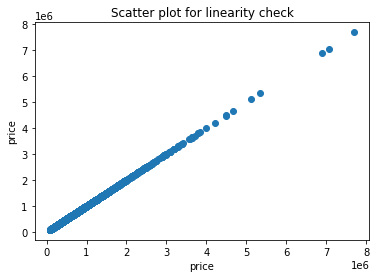

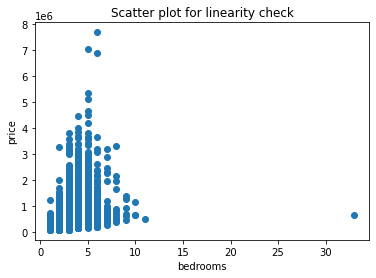

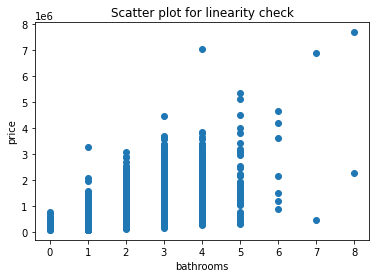

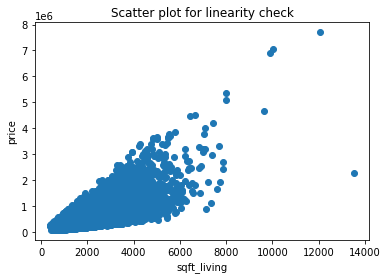

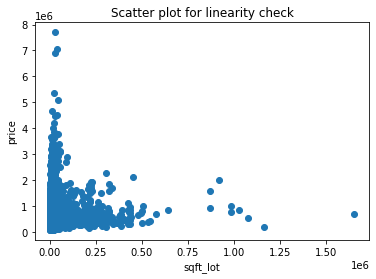

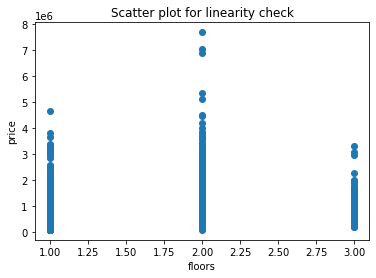

In [22]:
for column in numerical_columns:
    #Create plots
    plt.scatter(data[column],data['price'])
    #label axes and title
    plt.xlabel(column)
    plt.ylabel('price')
    plt.title('Scatter plot for linearity check')
    #Display plots
    plt.show()

From the above scatter plots,we can see that there is a linear relationship between 'price' and 'sqft_living'.The other relationships are discontiuous.

## Correlation Check

Correlation checks are performed during data exploration to understand the relationship between the variables.Correlation analysis helps to identify the presence and stregth of the relationships between the variables.Uderstanding these relationships will be crucial for gaining insights into the underlying structure of the data.We can also use coreelation analysis to detect multicollinearity between variables.

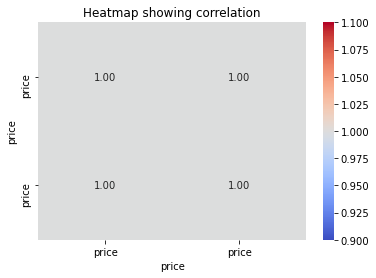

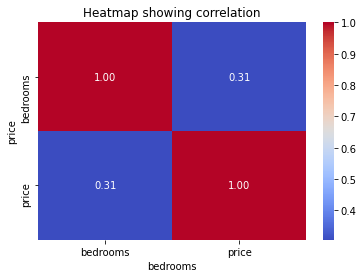

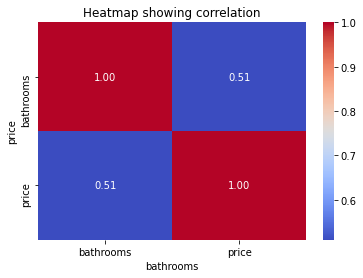

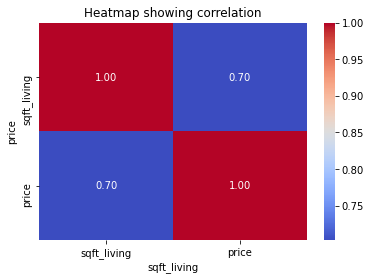

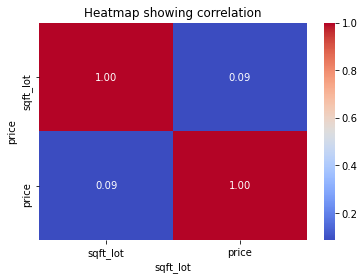

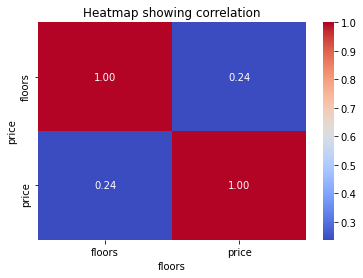

In [26]:
for column in numerical_columns:
    #create heatmaps
    sns.heatmap(data[[column,'price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    #Label axes and title
    plt.xlabel(column)
    plt.ylabel('price')
    plt.title('Heatmap showing correlation')
    #Display heatmap
    plt.show()

From the heatmaps above,we can conclude that there is a positive corelation relationship between all numerical independent variables and the target variable,which is the price.This means that if any of these independent variables increases,the price will also increase.While all these relationships are positive,it is important to note that 'sqft_living' has the strongest positive relationship with 'price' and 'sqft_lot' has the weakest postive relationship with 'price'